In [16]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [17]:
## 9138678373
## https://stackoverflow.com/questions/26248654/how-to-return-0-with-divide-by-zero aporte con 50 puntos

def div_by_zero (numerator,denominator):

    with np.errstate(divide='ignore', invalid='ignore'):
        c = np.true_divide(numerator,denominator)
        c[c == np.inf] = 0
        c = np.nan_to_num(c)
    
    return c


def white_patch(path):
    
    B, G, R = cv.split(cv.imread(path))

    B = B.astype(np.uint32) * div_by_zero([255],[np.amax(B)])[0]
    G = G.astype(np.uint32)* div_by_zero([255],[np.amax(G)])[0]
    R = R.astype(np.uint32)* div_by_zero([255],[np.amax(R)])[0]

    merged = cv.merge([B, G, R])
    
    file_ = "coor_"+path
    
    cv.imwrite(file_, merged.astype(np.uint8))
    plt.imshow(merged.astype('uint8'))

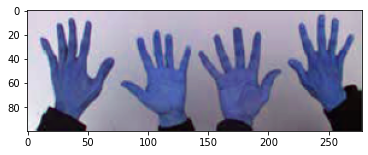

In [18]:
white_patch("test_blue.png")

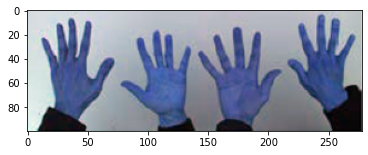

In [19]:
white_patch("test_green.png")

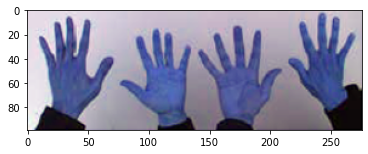

In [21]:
white_patch("test_red.png")

# White_patch presentaría fallas cuando la imagen es totalmente negra, ya que el max([R,G,B]) = (0,0,0), y tendríamos divisón por cero y unas imagen totalmente negra ya que div_by_zero toma la a/b = 0 cuando b = 0.